In [1]:
import numpy as np

In [14]:
class ScratchLinearRegression():
    
    """
   Scratch implementation of linear regression
    
     Parameters
     ----------
     num_iter : int
       number of iterations
     lr: float
       learning rate
     no_bias : bool
       True if no bias term is included
     verbose : bool
       True to output the learning process
    
     Attributes
     ----------
     self.coef_ : ndarray of the following shape, shape (n_features,)
       parameters
     self.loss : ndarray of the following shape, shape (self.iter,)
       Recording losses on training data
     self.val_loss : ndarray of the following shape, shape (self.iter,)
       Recording losses against validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose): 
        
        self.iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
     
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
      

    # Problem 6 (learning and estimation)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is input, the loss and accuracy for it are also calculated for each iteration.
         Parameters
         ----------
         X : ndarray of the following shape, shape (n_samples, n_features)
             Training data features
         y : ndarray of the following shape, shape (n_samples, )
             Ground truth value of training data
         X_val : ndarray of the following shape, shape (n_samples, n_features)
             Features of validation data
         y_val : ndarray of the following shape, shape (n_samples, )
             Correct value of validation data
        """
        
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            if X_val is not None:
                bias = np.ones((X_val.shape[0], 1))
                X_val = np.hstack((bias, X_val))
            self.coef_ = np.random.rand(X.shape[1])
            self.coef_ = self.coef_.reshape(X.shape[1], 1)
    

        for epoch in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            self.loss[epoch] = np.mean((y-y_pred)**2)
            
            if X_val is not None:
                pred_val = self._linear_hypothesis(X_val)
                self.val_loss[epoch] = np.mean((y_val-pred_val)**2)
                
            self.coef_ = self._gradient_descent(X, (y_pred-y))
           
            if self.verbose == True:
                print('{}-th epoch train loss {}'.format(epoch, self.loss[epoch]))
                if X_val is not None:
                    print('{}-th epoch val loss {}'.format(epoch, self.val_loss[epoch] ))


    # Question 1
    def _linear_hypothesis(self, X):
        """
       Compute the output of the hypothesis function
         Parameters
         ----------
         X : ndarray of the following shape, shape (n_samples, n_features)
           training data
         Returns
         -------
         ndarray of the following shape, shape (n_samples, 1)
         Estimation results using linear assumption function
        """
        pred = X @ self.coef_
        
        return pred

    # Problem 2
    def _gradient_descent(self, X, error):

        for i in range(X.shape[1]):
            gradient = error*X[:, i]
            self.coef_[i, :] = self.coef_[i, :] - self.lr * np.mean(gradient)

        return self.coef_
        

    # Problem 3
    def predict(self, X):
        if self.bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    # Question 4
    def _mse(self, y_pred, y):
        """
        Calculating mean squared error
        """
        mse = np.mean((y-y_pred)**2)
        
        return mse

    # Question 5
    def _loss_func(self, pred, y):
        """
       loss function
        """
        loss = self._mse(pred, y)/2

        return loss

Test

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv("../data/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
X = MinMaxScaler().fit_transform(X)
y = np.log(y.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [16]:
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0-th epoch train loss 116.10735018470682
0-th epoch val loss 116.4537993592473
1-th epoch train loss 112.49530510458892
1-th epoch val loss 112.83534099034716
2-th epoch train loss 108.99608232703666
2-th epoch val loss 109.32989203219927
3-th epoch train loss 105.60616575759407
3-th epoch val loss 105.93393076522473
4-th epoch train loss 102.32214875706667
4-th epoch val loss 102.64404509699301
5-th epoch train loss 99.1407307361326
5-th epoch val loss 99.45692915153576
6-th epoch train loss 96.05871385587243
6-th epoch val loss 96.36937996474322
7-th epoch train loss 93.07299983092396
7-th epoch val loss 93.37829428254457
8-th epoch train loss 90.18058683207008
8-th epoch val loss 90.48066545867518
9-th epoch train loss 87.3785664851679
9-th epoch val loss 87.6735804489346
10-th epoch train loss 84.66412096342263
10-th epoch val loss 84.95421689893348
11-th epoch train loss 82.03452017010373
11-th epoch val loss 82.319840322423
12-th epoch train loss 79.48711900888985
12-th epoch val

In [17]:
slr.predict(X_test)

array([[12.80731167],
       [10.61743588],
       [12.06102741],
       [10.15320822],
       [12.1159035 ],
       [13.18618092],
       [11.41794831],
       [13.35882172],
       [13.44980011],
       [13.10904681],
       [ 9.91019967],
       [13.11602999],
       [12.94177422],
       [13.19015351],
       [12.05702241],
       [12.20058157],
       [13.30906714],
       [ 8.54293476],
       [11.54856288],
       [12.21659653],
       [13.46252535],
       [13.86023323],
       [ 9.97684153],
       [13.38110964],
       [11.6747064 ],
       [13.42323059],
       [13.39250157],
       [10.62901473],
       [10.48942562],
       [11.60573681],
       [11.30257363],
       [11.82698833],
       [10.99587149],
       [11.66893445],
       [13.29242656],
       [10.90377408],
       [ 9.72442735],
       [10.10807667],
       [ 9.78656827],
       [12.9568596 ],
       [11.87177845],
       [12.35664663],
       [11.09358382],
       [12.72021367],
       [10.07638565],
       [11

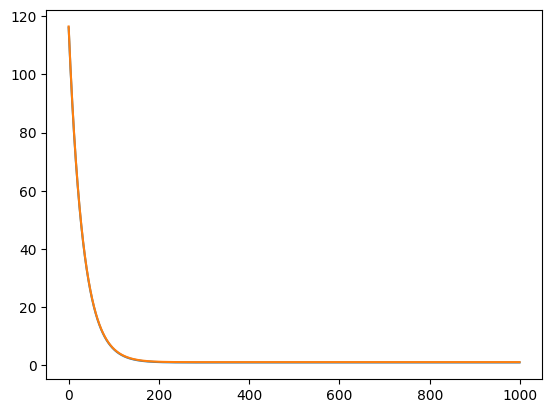

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)